In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns

In [2]:
base_path = r"D:\FUCK!!\Pattern\Project\g-images-dataset"

image_paths = []
labels = []

In [5]:
if not os.path.exists(base_path):
    print(f"Error: Directory {base_path} does not exist")
    exit()

try:
    class_dirs = [d for d in os.listdir(base_path) 
                 if os.path.isdir(os.path.join(base_path, d))]
except Exception as e:
    print(f"Error reading directory {base_path}: {str(e)}")
    exit()

class_dirs = class_dirs[:10]
print("\nSelected classes:")
for i, class_name in enumerate(class_dirs, 1):
    print(f"{i}. {class_name}")

for class_name in class_dirs:
    class_dir = os.path.join(base_path, class_name)
    try:
        image_files = [f for f in os.listdir(class_dir) 
                      if f.lower().endswith((".jpg", ".jpeg", ".png"))]
        
        for fname in image_files:
            image_paths.append(os.path.join(class_dir, fname))
            labels.append(class_name)
            
    except Exception as e:
        print(f"Warning: Error processing directory {class_dir}: {str(e)}")
        continue

if not image_paths:
    print(f"No images found in {base_path}")
    exit()


Selected classes:
1. Achaemenid architecture
2. American craftsman style
3. American Foursquare architecture
4. Ancient Egyptian architecture
5. Art Deco architecture
6. Art Nouveau architecture
7. Baroque architecture
8. Bauhaus architecture
9. Beaux-Arts architecture
10. Byzantine architecture


In [6]:
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

df['filename'] = df['image_path'].apply(lambda x: os.path.basename(x))

In [5]:
print("\nDataFrame Info:")
print(df.info())
print("\nFirst few rows of the DataFrame:")
print(df.head())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2185 non-null   object
 1   label       2185 non-null   object
 2   filename    2185 non-null   object
dtypes: object(3)
memory usage: 51.3+ KB
None

First few rows of the DataFrame:
                                          image_path                    label  \
0  D:\FUCK!!\Pattern\Project\g-images-dataset\Ach...  Achaemenid architecture   
1  D:\FUCK!!\Pattern\Project\g-images-dataset\Ach...  Achaemenid architecture   
2  D:\FUCK!!\Pattern\Project\g-images-dataset\Ach...  Achaemenid architecture   
3  D:\FUCK!!\Pattern\Project\g-images-dataset\Ach...  Achaemenid architecture   
4  D:\FUCK!!\Pattern\Project\g-images-dataset\Ach...  Achaemenid architecture   

     filename  
0  000000.jpg  
1  000002.jpg  
2  000003.jpg  
3  000004.jpg  
4  000005.jpg  


In [6]:
print(f"\nTotal number of images: {len(df)}")
print(f"Number of classes: {df['label'].nunique()}")
print("\nClass distribution:")
print(df['label'].value_counts())


Total number of images: 2185
Number of classes: 10

Class distribution:
label
Achaemenid architecture             323
American Foursquare architecture    303
Beaux-Arts architecture             233
Bauhaus architecture                223
Baroque architecture                217
Byzantine architecture              202
Art Deco architecture               200
American craftsman style            169
Art Nouveau architecture            165
Ancient Egyptian architecture       150
Name: count, dtype: int64


In [7]:
output_path = "image_dataset.csv"
df.to_csv(output_path, index=False)
print(f"\nDataFrame saved to {output_path}")


DataFrame saved to image_dataset.csv


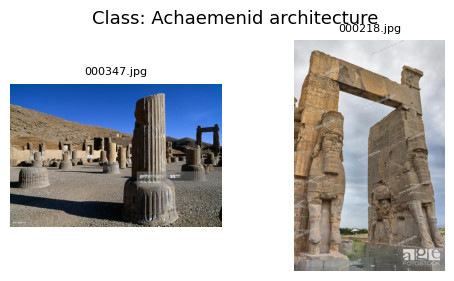

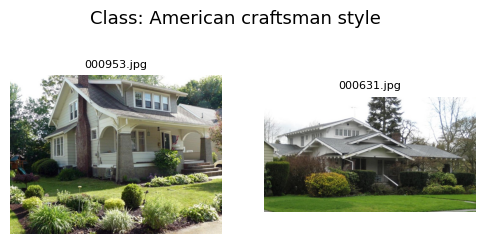

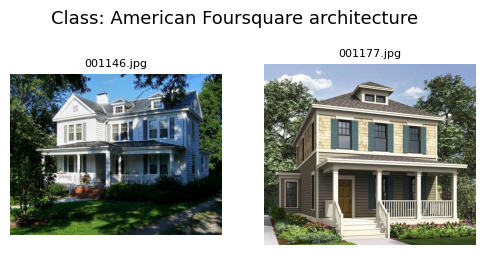

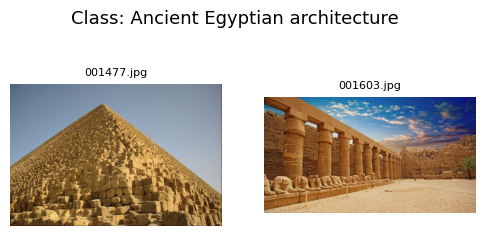

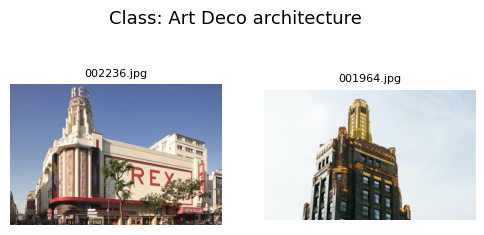

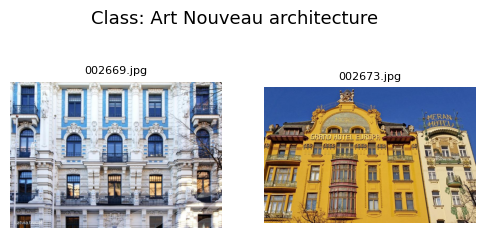

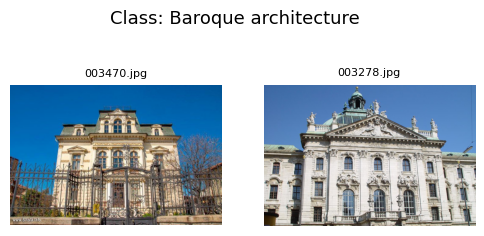

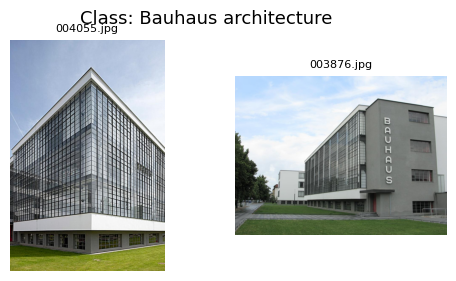

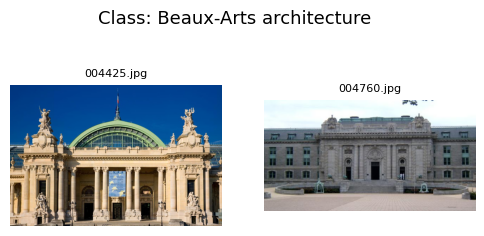

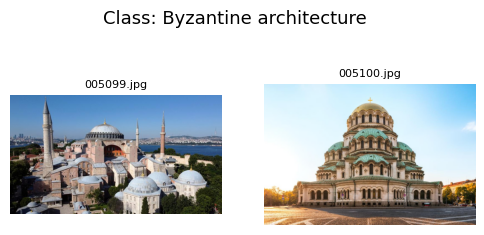

In [14]:
samples_per_class = 2

classes = df['label'].unique()

for class_name in classes:
    class_images = df[df['label'] == class_name]['image_path'].tolist()
    sampled_images = random.sample(class_images, min(samples_per_class, len(class_images)))
    
    plt.figure(figsize=(6, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=13)
    for i, img_path in enumerate(sampled_images):
        plt.subplot(1, samples_per_class, i + 1)
        try:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(os.path.basename(img_path), fontsize=8)
        except Exception as e:
            plt.text(0.5, 0.5, 'Error', ha='center', va='center')
            plt.axis('off')
    plt.show()

C:\Users\omarn\AppData\Local\Temp\ipykernel_7796\2117666832.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


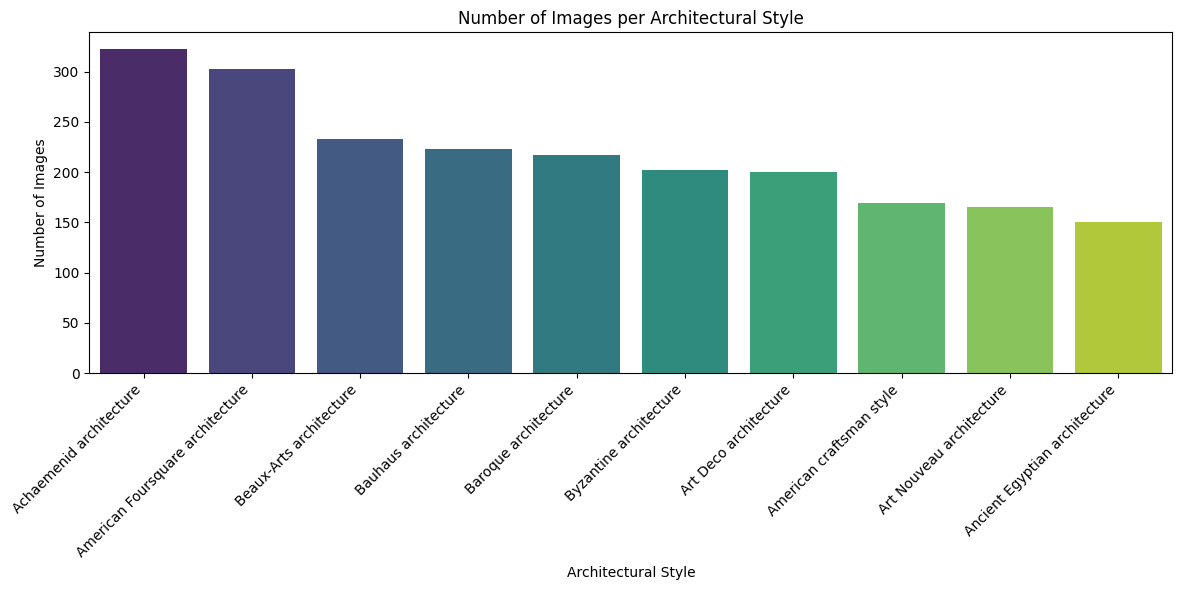

In [9]:
class_counts = df['label'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Architectural Style')
plt.ylabel('Number of Images')
plt.title('Number of Images per Architectural Style')
plt.tight_layout()
plt.show()

In [10]:
widths, heights, aspect_ratios = [], [], []

for path in df['image_path']:
    try:
        with Image.open(path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h)
    except Exception as e:
        widths.append(float('nan'))
        heights.append(float('nan'))
        aspect_ratios.append(float('nan'))

df['width'] = widths
df['height'] = heights
df['aspect_ratio'] = aspect_ratios

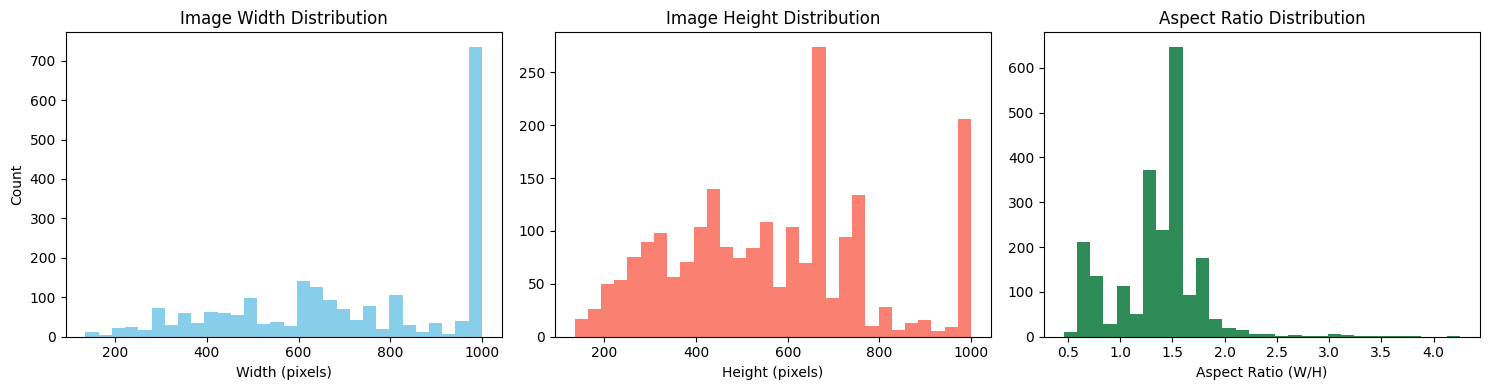

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df['width'].dropna(), bins=30, color='skyblue')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 3, 2)
plt.hist(df['height'].dropna(), bins=30, color='salmon')
plt.xlabel('Height (pixels)')
plt.title('Image Height Distribution')

plt.subplot(1, 3, 3)
plt.hist(df['aspect_ratio'].dropna(), bins=30, color='seagreen')
plt.xlabel('Aspect Ratio (W/H)')
plt.title('Aspect Ratio Distribution')

plt.tight_layout()
plt.show()